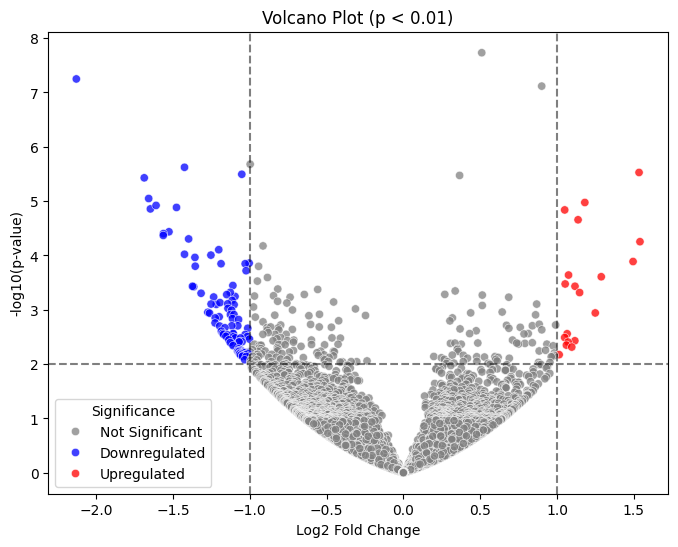


Upregulated Genes:
          Gene  log2FoldChange    pvalue
5      EMILIN2           1.534  0.000003
10      POU3F4           1.181  0.000011
14   LOC285954           1.050  0.000015
15       VEPH1           1.137  0.000022
20       DTHD1           1.540  0.000056
29        PI16           1.495  0.000130
33     GALNTL2           1.075  0.000230
34     C4orf45           1.288  0.000247
37       PDE1B           1.053  0.000336
38        BCAN           1.117  0.000370
56       KCNQ3           1.147  0.000483
74     FAM180B           1.249  0.001146
125      CBLN1           1.066  0.002768
139      TRPM2           1.050  0.003246
151   HEPACAM2           1.116  0.003727
156      CBLN2           1.072  0.003934
177  DPY19L2P3           1.061  0.004480
183      CMTM5           1.096  0.004868
227    PCDHGB7           1.014  0.006713


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

# Step 1: Load dataset from the URL with space as the separator
data_source = "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt"
df = pd.read_csv(data_source, sep=" ", engine="python")

# Step 2: Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Step 3: Determine p-value column ('pvalue' preferred, fallback to 'padj')
pval_col = 'pvalue' if 'pvalue' in df.columns else 'padj'

# Step 4: Compute -log10(p-value) for visualization
df["-log10(p-value)"] = -np.log10(df[pval_col])

# Step 5: Categorize significance
df["Significance"] = "Not Significant"
df.loc[(df["log2FoldChange"] > 1) & (df[pval_col] < 0.01), "Significance"] = "Upregulated"
df.loc[(df["log2FoldChange"] < -1) & (df[pval_col] < 0.01), "Significance"] = "Downregulated"

# Step 6: Set color mapping
color_palette = {
    "Upregulated": "red",
    "Downregulated": "blue",
    "Not Significant": "gray"
}

# Step 7: Generate Volcano Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="log2FoldChange",
    y="-log10(p-value)",
    hue="Significance",
    palette=color_palette,
    alpha=0.75
)
plt.axvline(x=1, linestyle="dashed", color="black", alpha=0.5)
plt.axvline(x=-1, linestyle="dashed", color="black", alpha=0.5)
plt.axhline(y=-np.log10(0.01), linestyle="dashed", color="black", alpha=0.5)
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot (p < 0.01)")
plt.legend(title="Significance")
plt.show()

# Step 8: Function to filter genes
def filter_genes(df, log2fc_threshold, pval_threshold, direction="up"):
    if direction == "up":
        return df[(df["log2FoldChange"] > log2fc_threshold) & (df[pval_col] < pval_threshold)]
    elif direction == "down":
        return df[(df["log2FoldChange"] < -log2fc_threshold) & (df[pval_col] < pval_threshold)]

# Step 9: Get Upregulated and Downregulated genes
upregulated_genes = filter_genes(df, log2fc_threshold=1, pval_threshold=0.01, direction="up")
downregulated_genes = filter_genes(df, log2fc_threshold=1, pval_threshold=0.01, direction="down")

# Step 10: Display results
print("\nUpregulated Genes:")
print(upregulated_genes[["Gene", "log2FoldChange", pval_col]])